## Brief Demo on how to make manual selections with Napari

First we import the necessary libraries

In [1]:
import scanpy as sc
import squidpy as sq
import numpy as np
import os.path as osp
from PIL import Image

Next we define the paths to our data, the `IMG_PATH` variable is the path to the image file named `tissue_hires_image.png` located in the `spatial` folder found in the `spaceranger` output data.

In [2]:
# image data file
IMG_PTH = "../../../data/spatial/hippo/rawdata/ST8059049/spatial/tissue_hires_image.png"
# data directory
DATA_DIR = osp.dirname(osp.dirname(IMG_PTH))
# new library name (we will change to this)
new_library_id = osp.basename(DATA_DIR)

Next we load the data

In [3]:
# read the spatial data
adata = sc.read_visium(DATA_DIR)
# load image and convert to numpy array, we also transpose the image
img = np.array(Image.open(IMG_PTH)).transpose(2,0,1)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Here we get the old library ID, which we need in order to be able to update the library id name to `new_library_id`

In [4]:
# get old library name
old_library_id = list(adata.uns["spatial"].keys())[0]
old_library_id

'spaceranger100_count_30458_ST8059049_mm10-3_0_0_premrna'

next we update the library id 

In [5]:
adata.uns["spatial"][new_library_id] = adata.uns["spatial"].pop(old_library_id)

we then also extract the scalefactors, so that the image

In [6]:
scalefactor = adata.uns["spatial"][new_library_id]["scalefactors"]["tissue_hires_scalef"]

we are now ready to create an `ImageContainer` object (class from `squidpy`) based on the image

In [7]:
img = sq.im.ImageContainer(img, # image object
                           dims=("channels", "y", "x"), # name of dimensions
                           layer="img1", # layer name
                           scale = scalefactor, # scalefactor to use
                           library_id = new_library_id, # library name
                          )


Having installed `squidpy[interactive]` we can instatiate a viewer, which we do by calling `img.interactive`, we also specify that we want to pair the `anndata` object `adata`with the image container in question.

In [14]:
viewer = img.interactive(adata)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/home/alma/miniconda3/envs/scanpy_spatial/lib/python3.8/site-packages/napari/_vispy/vispy_camera.py:109: RuntimeWarning: divide by zero encountered in true_divide
  zoom = np.min(canvas_size / scale)


Having annotated our object, we transfer these annotations back to the original anndata object. This is not necessary if we have the `fullres` image to work with (more on this on Wednesday), but for now this is the easiest solution.

In [16]:
adata.obs = viewer.adata.obs
adata

AnnData object with n_obs × n_vars = 3499 × 31053
    obs: 'in_tissue', 'array_row', 'array_col', 'hipposcampus_shapes', 'hippocampus_shapes'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'dentate_gyrus_shapes_colors'
    obsm: 'spatial'

I named my annotation "hippocampus" (after the region it encompasses), hence the `.obs` column where you can find these annotations are `hippocampus_shapes`

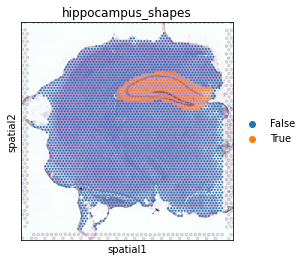

In [17]:
sc.pl.spatial(adata,color = ["hippocampus_shapes"])